# Clustering Algorithm

In [52]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# import PCA 
from sklearn.decomposition import PCA

# kmeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

import os

In [53]:
# CHECKING THE WORKING DIRECTORY
os.getcwd()

'C:\\Users\\User\\Desktop\\Github\\Untitled Folder'

In [14]:
# READING THE DATASET
df = pd.read_csv('Country-data.csv',sep=',')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
# CHECKING THE ROWS AND COLUMNS OF THE DATASET
df.shape

(167, 10)

In [16]:
# Data description

In [17]:
# CHECKING THE DATATYPES
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [18]:
# CHECKING THE TOTAL OF NULL VALUES PRESENT IN EACH COLUMN
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [19]:
# are there duplicate values?
format(len(df[df.duplicated()]))

'0'

In [20]:
# STATISTICAL SUMMARY OF THE DATAFRAME
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# EDA


## Univariate Analysis

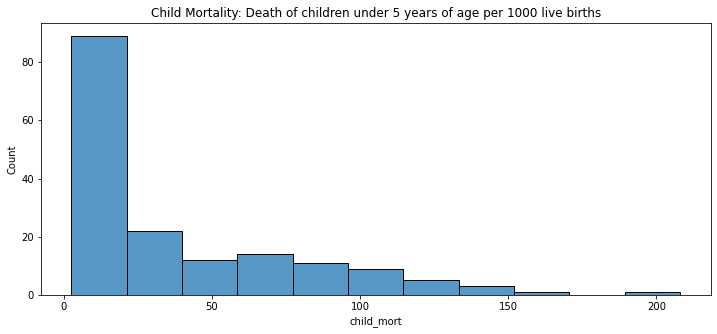

In [22]:
plt.figure(figsize=(12,5))
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax = sns.histplot(df["child_mort"])

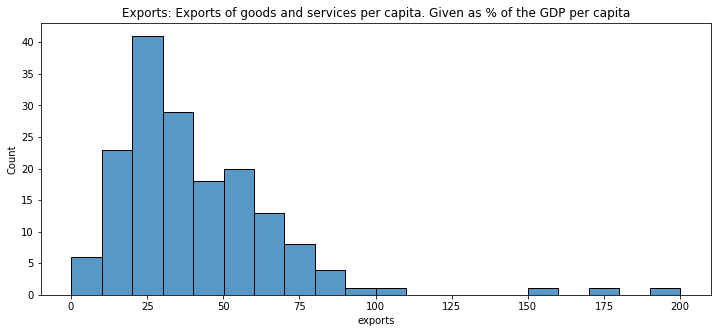

In [24]:
plt.figure(figsize=(12,5))
plt.title("Exports: Exports of goods and services per capita. Given as % of the GDP per capita")
ax = sns.histplot(df["exports"

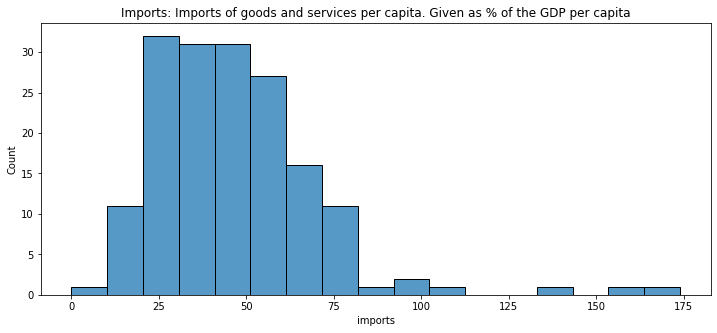

In [26]:
plt.figure(figsize=(12,5))
plt.title("Imports: Imports of goods and services per capita. Given as % of the GDP per capita")
ax = sns.histplot(df["imports"])

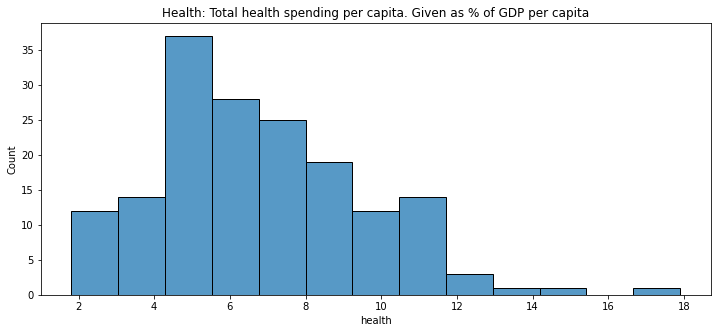

In [28]:
plt.figure(figsize=(12,5))
plt.title("Health: Total health spending per capita. Given as % of GDP per capita")
ax = sns.histplot(df["health"])

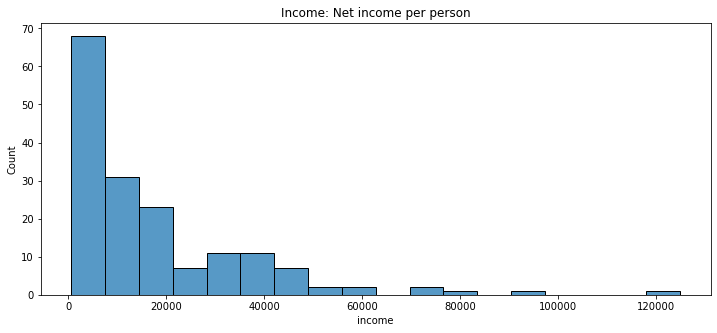

In [30]:
plt.figure(figsize=(12,5))
plt.title("Income: Net income per person")
ax = sns.histplot(df["income"])

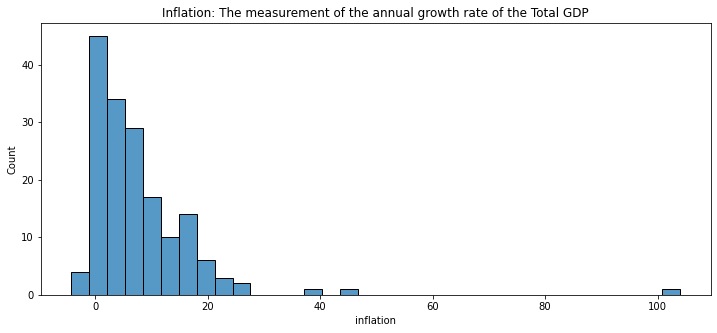

In [31]:
plt.figure(figsize=(12,5))
plt.title("Inflation: The measurement of the annual growth rate of the Total GDP")
ax = sns.histplot(df["inflation"])

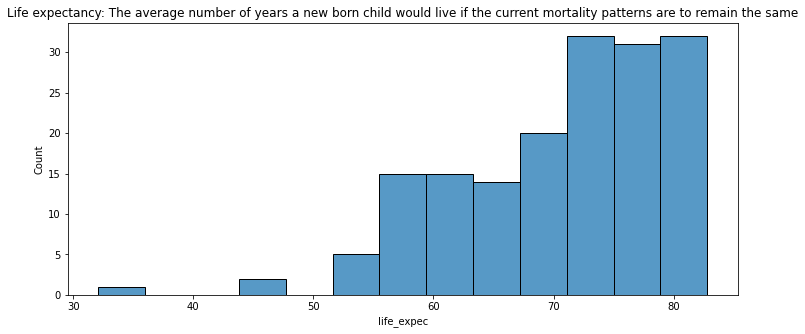

In [32]:
plt.figure(figsize=(12,5))
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same")
ax = sns.histplot(df["life_expec"])

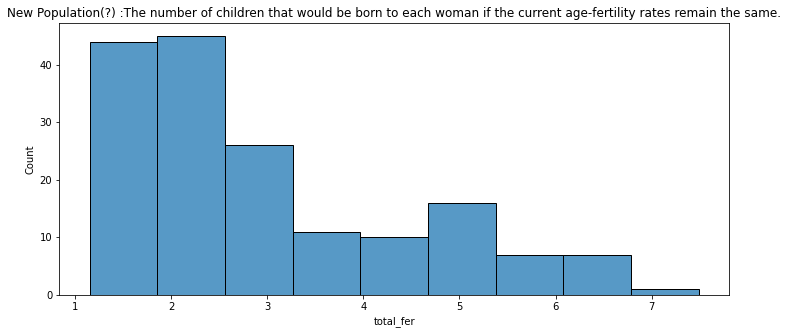

In [33]:
plt.figure(figsize=(12,5))
plt.title("New Population(?) :The number of children that would be born to each woman if the current age-fertility rates remain the same.")
ax = sns.histplot(df["total_fer"])

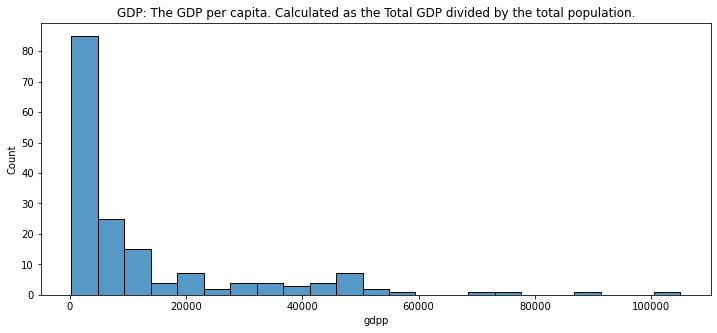

In [34]:
plt.figure(figsize=(12,5))
plt.title("GDP: The GDP per capita. Calculated as the Total GDP divided by the total population.")
ax = sns.histplot(df["gdpp"])

## OBSERVATIONS

Looking at the data distribution we can see that there are some features that do indeed have outliers.

For the purpose of this analysis, outliers will not be removed since they could be considered very informative in that they could point out countries that are in critical condition and in need of help.

For example, Child Mortality is a strong indicator of poverty and necessity, so the outliers in this feature show that there are countries with a higher than normal/critical number in child mortality.

## Multivariate Analysis

<AxesSubplot:>

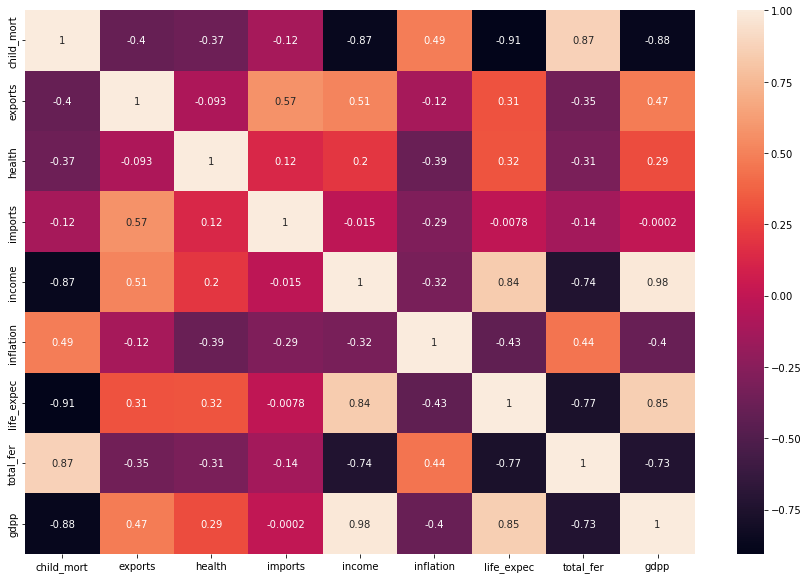

In [37]:
#Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman', min_periods=1),annot=True)

## OBSERVATIONS

Are there feature(s) that we could do without due to having high correlation with another feature?

After looking at Spearman correlation, we can see that there are a few features that might be considered for elimination due to high correlation.

life_expect, due to high correlation with child mortality
total_fertility, due to high correlation with child mortality
income, due to high correlation with gdpp

In [43]:
# eliminate the column that contains the country information, as only numeric values should be used in this case for unsupervised learning
dataset = df.drop(['country'], axis =1)
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [61]:
# save dataframe to pickle file
df.to_pickle('country_df.pkl')